# Homework 1 Exercise 4
Suppose there is bias in sampling so that Land is more likely than Water to be recorded. Specifically, assume that 1-in-5 (20%) of Water samples are accidentally recorded instead as ”Land”. First, write a generative simulation of this sampling process. Assuming the true proportion of Water is 0.70, what proportion does your simulation tend to produce instead? Second, using a simulated sample of 20 tosses, compute the unbiased posterior distribution of the true proportion of water.

In [1]:
using StatsPlots
using StatisticalRethinking: hpdi, PI
using Gen, Distributions

## First solution (only Distributions.jl)

In [2]:
samples = 20

20

In [3]:
true_water_distribution = Binomial(samples, 0.7)
true_water = rand(true_water_distribution)

13

In [4]:
recorded_water_distribution = Binomial(true_water, 0.8)
recorded_water = rand(recorded_water_distribution)

11

## Second solution (Distributions.jl brevity)

In [5]:
water_distribution = Binomial(samples, 0.7 * 0.8)
water = rand(water_distribution)

13

## Third solution (Gen.jl Bernoulli)

In [6]:
@gen function problem4_bernoulli_model(samples=samples, water_proportion=0.7, bias=0.8)
    true_toss ~ bernoulli(water_proportion)
    no_mistake ~ bernoulli(bias)
    recorded_toss_probability = Float64(true_toss && no_mistake)
    recorded_toss ~ bernoulli(recorded_toss_probability)
    return recorded_toss
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any, Any, Any], true, Union{Nothing, Some{Any}}[Some(20), Some(0.7), Some(0.8)], var"##problem4_bernoulli_model#274", Bool[0, 0, 0], false)

In [7]:
trace = Gen.simulate(problem4_bernoulli_model, ())
Gen.get_choices(trace)

│
├── :true_toss : true
│
├── :no_mistake : true
│
└── :recorded_toss : true


## Fourth solution (Gen.jl Binomial)

In [8]:
@gen function problem4_binomial_model(samples=samples, water_proportion=0.7, bias=0.8)
    true_water ~ binom(samples, water_proportion)
    recorded_water ~ binom(true_water, bias)
    return recorded_water
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any, Any, Any], true, Union{Nothing, Some{Any}}[Some(20), Some(0.7), Some(0.8)], var"##problem4_binomial_model#275", Bool[0, 0, 0], false)

In [9]:
trace = Gen.simulate(problem4_binomial_model,())
Gen.get_choices(trace)

│
├── :recorded_water : 7
│
└── :true_water : 8


## Fifth solution (Gen.jl Binomial Brevity)

In [10]:
@gen function problem4_binomial_brevity_model(samples=samples, water_proportion=0.7, bias=0.8)
    recorded_water ~ binom(samples, water_proportion * bias)
    return recorded_water
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any, Any, Any], true, Union{Nothing, Some{Any}}[Some(20), Some(0.7), Some(0.8)], var"##problem4_binomial_brevity_model#276", Bool[0, 0, 0], false)

In [11]:
trace = Gen.simulate(problem4_binomial_brevity_model,())
Gen.get_choices(trace)

│
└── :recorded_water : 10


## Calculating the true posterior

In [12]:
tosses = 20
grid_length = 100
recorded_water = rand(Binomial(tosses, 0.7 * 0.8))
grid_p = Vector{Float64}(range(0, 1, length=grid_length))
prior = ones(grid_length)
probability_water = pdf.(Binomial.(tosses, grid_p .* 0.8), water)
posterior = probability_water .* prior
posterior_bad = pdf.(Binomial.(tosses, grid_p), water) # does not correct for bias
recorded_water

12

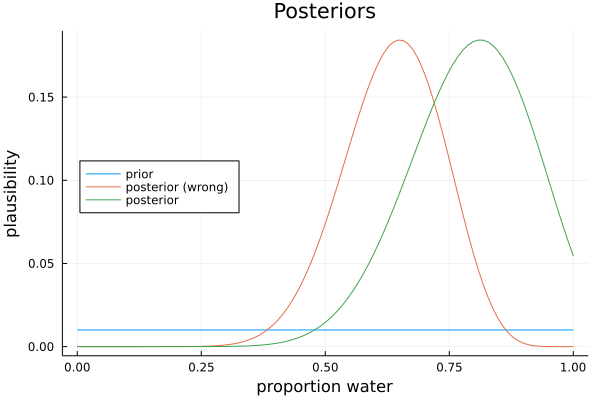

In [13]:
plot(grid_p, [(prior ./ sum(prior)) posterior_bad posterior], title="Posteriors", xlabel="proportion water", ylabel="plausibility", labels=["prior" "posterior (wrong)" "posterior"], legend=:left)